In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ppr.robot import Robot_2P3R,Robot_3R
from ppr.path import TrajectoryPt, TolerancedNumber, TrajectoryPtLineTol
from ppr.geometry import Rectangle
from ppr.path import cart_to_joint
from ppr.path import get_shortest_path

In [9]:
# ROBOT
robot1 = Robot_2P3R([1, 1, 2, 1.2, 1])
robot1.set_joint_limits([(0.5, 1.0), (2.0, 3.0)])
robot1.ik_samples = [3, 5]

# COLLISION SCENE
sc1 = [Rectangle(1, 1, 1, 1.5, 0),
       Rectangle(3, 1, 1, 2.2, 0),
       Rectangle(0, 3.2, 4, 0.5, 0),
       Rectangle(0, 1, 0.2, 3.2, 0),
       Rectangle(0.2, 1, 0.8, 0.5, 0)]

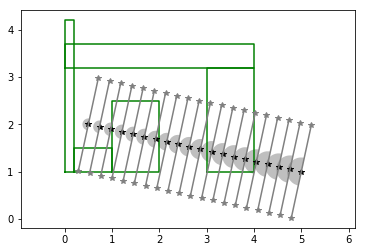

In [22]:
# create path based on two points
pa = np.array([0.5, 2, -2.5])
pb = np.array([5, 1, 0])

t = np.linspace(0, 1, 20)
line_tol = TolerancedNumber(0, -1, 1, samples=4)
angle_tol = TolerancedNumber(0.0, -np.pi, 0, samples=10)
slope = -(pb[0] - pa[0]) / (pb[1] - pa[1])

path1 = []
for i, ti in enumerate(t):
    pi = (1 - ti) * pa + ti * pb
    pi2 = [pi[0], pi[1], angle_tol]
    path1.append(TrajectoryPtLineTol(pi2, line_tol, slope))

fig2, ax2 = plt.subplots()
ax2.axis('equal')
for r in sc1: r.plot(ax2, 'g')
for tp in path1: tp.plot(ax2)
plt.show()

In [23]:
path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1)
print([len(qp) for qp in path_js])

[55, 102, 93, 101, 104, 100, 119, 178, 201, 199, 224, 174, 171, 273, 330, 544, 566, 528, 473, 379]


converting type of Q
[31 53 38 23 32 44 57 78 80 77 76 58 58 82 55 64 82 82 88 86]
True
13.033989906311035


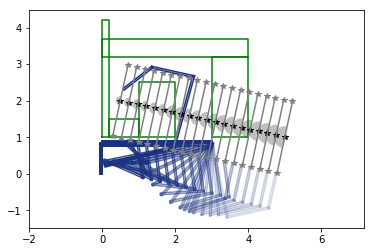

In [24]:
sol = get_shortest_path(path_js)
print(sol['success'])
print(sol['length'])

fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[2])
robot1.plot_path(ax2, sol['path'])
for r in sc1: r.plot(ax2, 'g')
for tp in path1: tp.plot(ax2)
plt.show()

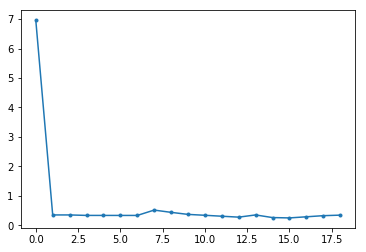

In [27]:
jv = np.vstack(sol['path'])
c = np.sum(np.abs(np.diff(jv, axis=0)), axis=1)
plt.plot(c, '.-')
plt.show()

## Conclusion

- add maximum edge cost in graph to prevent jumping over obstacles (for path planning this jumping should be replaced with a point to point trajectory to continue welding on the other side of an obstacle)
- first plan for end effector only in cartesian space, then plan for the rest of the robot
- create collision free cartesian tolerance, then plan in joint space